# <font color="blue">Covid-19 Detection</font>

## Load Packages

In [1]:
#import pandas as pd images shapes sizes resize reshape use 
#import numpy as np
import cv2 # Its a open source module used for the images reshaping etc...
from pickle import * #Storing and loading the information using dump and load functions
import random #Used to get the random values
import os # read for the path files,directories,files etc...

import matplotlib.pyplot as plt #Visualising the graphs like bar gh,h bars,pie charts etc...
import seaborn as sns #heatmaps

#It is a machine learning module used for the spliting the test and train data,confusion matrix etc...
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#It is a machine learning framework used to create deep learning models.
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Model
from tensorflow.keras.models import load_model

import warnings 
warnings.filterwarnings('ignore')

## Dataset

In [2]:
#Defined the path for the dataset
dataset = r"C:\Users\DELL\Desktop\COVID 19 Visualization & Detection\Datasets\Dataset for Detection"

In [5]:
c=0
for dirname, f, filenames in os.walk(dataset):
    for filename in filenames:
        c =c+1
        print(os.path.join(dirname,filename))
print(c)

[]
C:\Users\DELL\Desktop\COVID 19 Visualization & Detection\Datasets\Dataset for Detection\covid\01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg
[]
C:\Users\DELL\Desktop\COVID 19 Visualization & Detection\Datasets\Dataset for Detection\covid\1-s2.0-S0140673620303706-fx1_lrg.jpg
[]
C:\Users\DELL\Desktop\COVID 19 Visualization & Detection\Datasets\Dataset for Detection\covid\1-s2.0-S0929664620300449-gr2_lrg-a.jpg
[]
C:\Users\DELL\Desktop\COVID 19 Visualization & Detection\Datasets\Dataset for Detection\covid\1-s2.0-S0929664620300449-gr2_lrg-b.jpg
[]
C:\Users\DELL\Desktop\COVID 19 Visualization & Detection\Datasets\Dataset for Detection\covid\1-s2.0-S0929664620300449-gr2_lrg-c.jpg
[]
C:\Users\DELL\Desktop\COVID 19 Visualization & Detection\Datasets\Dataset for Detection\covid\1-s2.0-S0929664620300449-gr2_lrg-d.jpg
[]
C:\Users\DELL\Desktop\COVID 19 Visualization & Detection\Datasets\Dataset for Detection\covid\1-s2.0-S1684118220300608-main.pdf-001.jpg
[]
C:\Users\DELL\Desktop\COVID 19 Visualizat

## Visualizing the Dataset

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

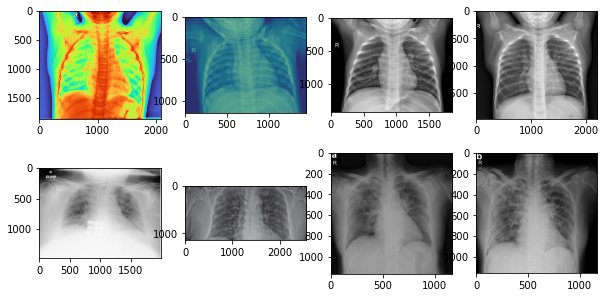

In [58]:
import glob
#for ploting the graphs
import matplotlib.pyplot as plt
#to read a image
import matplotlib.image as mpimg
%matplotlib inline

#normal images is an empty list
#appending the reading images
#glob. glob() method returns a list of files or folders that matches the path specified in the pathname argument

#m[0][0] axes

normal_images = []
for img_path in glob.glob(dataset + '/normal/*'):
    normal_images.append(mpimg.imread(img_path))
#It returns the fig instance and axes
#rows,cloumns
fig, axes = plt.subplots(2,4,figsize=(10,5))
axes[0,0].imshow(normal_images[0],cmap='turbo') 
axes[0,1].imshow(normal_images[1],cmap='crest_r')
axes[0,2].imshow(normal_images[2],cmap='gray')
axes[0,3].imshow(normal_images[3],cmap='gray')

covid_images = []
for img_path in glob.glob(dataset + '/covid/*'):
    covid_images.append(mpimg.imread(img_path))
#print("covid")
axes[1,0].imshow(covid_images[0]) 
axes[1,1].imshow(covid_images[1])
axes[1,2].imshow(covid_images[2])
axes[1,3].imshow(covid_images[3])

#List of Supported ColorMaps
#plt.colormaps() cmaps

   Technique of applying different transformations to original images which results in multiple transformed copies of the same image. Each copy, however, is different from the other in certain aspects depending on the augmentation techniques you apply like shifting, rotating, flipping, etc.

In [28]:
#data_generator is a object for ImageDatagenerator
data_generator=tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,          #Normalzation
    shear_range=0.2,
    zoom_range=0.2, #20%
    horizontal_flip=True,
    validation_split=0.2 #splitting the data into training and testing
    
)



The flow_from_directory() method allows you to read the images directly from the directory and augment them while the neural network model is learning on the training data.
The method expects that images belonging to different classes are present in different folders but are inside the same parent folder.

The following are few important parameters of this method:
1.	directory: This is the path to the parent folder which contains the subfolder for the different class images.
2.	target_size: Size of the input image.
3.	color_mode: Set to rgb for colored images otherwise grayscale if the images are black and white.
4.	batch_size: Size of the batches of data.
    32 samples from the training dataset will be used to estimate the error gradient before the model weights are updated
5.	class_mode: Set to binary is for 1-D binary labels whereas categorical is for 2-D one-hot encoded labels.
6.	seed: Set to reproduce the result.Keeping the random seed constant from one experiment to the next removes the variation due     to this randomness

In [29]:
training_data=data_generator.flow_from_directory(
    dataset,
    seed=42, 
    target_size=(200,200),
    batch_size=32,
    class_mode='binary',  #binary 0 or 1 Multiple categorical    
    subset='training'
)

Validation_data=data_generator.flow_from_directory(
    dataset,
    seed=42,
    target_size=(200,200),
    batch_size=32,
    class_mode='binary',
    #color_mode = 'grayscale',
    subset='validation'
)

Found 76 images belonging to 2 classes.
Found 18 images belonging to 2 classes.


A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

The first thing to get right is to ensure the input layer has the right number of input features. This can be specified when creating the first layer with the input_dim argument.

The Dense layer is used for passing the outputs from one layer of neurons to a separate layer of neurons as inputs. 

1.	Loss Function: This is the function that evaluated how well your algorithm models your data set.
2.	Optimizer: This is a method that finds the weights that minimize your loss function.
3.	Metrics: For regression, we typically define the metric to be the loss function. This allows us to keep track of the loss                as the model is being trained.

In [30]:
def create_model():
  model = tf.keras.models.Sequential([
    #Used for extratcting the important features
  tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(200,200,3)), #input layer
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
      
  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),     
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
      
  tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
  tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    #[[2,3,4,5],[3,4,5,6,7]] = [2,3,4,5,6,3,4,5,6,7]
  tf.keras.layers.Flatten(),
      #Fully connected layer simply neuron connecting with alll the neurons in the previous layer
  tf.keras.layers.Dense(128,activation='relu'),
      #Overfitting
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(10,activation='softmax')]) #Output layer [0.3 0.7] [0.6 0.4] [0.1 0.1 0.1 0.3 0.05 0.05]
#E = 1/2 e2

  #Compile defines the loss function, the optimizer and the metrics
    #optimizer changes the weights according to minimize the loss 
  model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model

In [31]:
model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 23, 23, 64)      

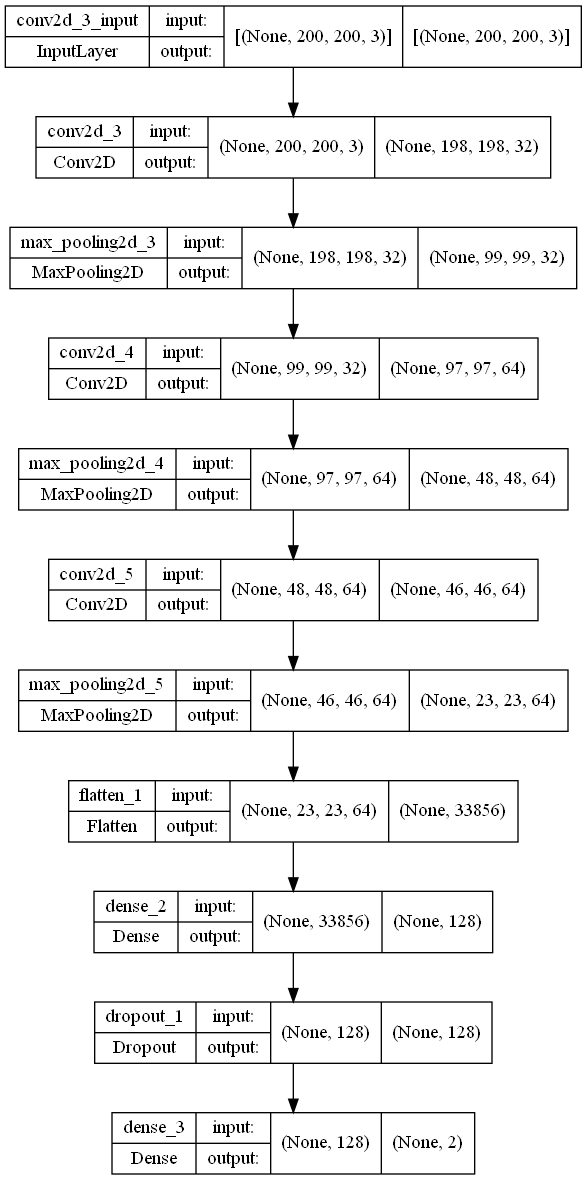

In [61]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

                   When training deep learning models, the checkpoint is the weights of the model. 
                   These weights can be used to make predictions as is, or used as the basis for ongoing 
                   training.

In [33]:
#Saving the models and weights
checkpoint_path =r"C:\Users\DELL\Desktop\COVID 19 Visualization & Detection\training\cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,save_weights_only=True,verbose=1)

You need to do is feed the iterator as an input to the Keras fit_generator() method applied on the neural network model along with epochs, batch_size, and other important arguments. We will be using a Convolutional Neural Network(CNN) model. The fit_generator() method fits the model on data that is yielded batch-wise by a Python generator.

Let’s take a moment to understand the arguments of the fit_generator() method first before we start building our model.
1.  The first argument is the iterator for the train images that we get from the  flow_from_directory() method.
2.	Epochs are the number of forward/backward passes of the training data.
3.	Steps_per_epoch is an important argument. It specifies the number of batches of images that are in a single epoch. It is         usually taken as the length of the original dataset divided by the batch size.
4.	Validation_data takes the validation dataset or the validation generator output from the generator method.
5.  callbacks a list of callback functions applied during the training of our model.

In [34]:
#fit() is for training the model with the given inputs (and corresponding training labels)
classifier=model.fit_generator(
    training_data,
    epochs=50, #forward backward
    validation_data=Validation_data, 
    callbacks =[cp_callback])
#Accuracy accuracy for the training data
#Loss loss value for the training data
#val_loss loss value for the validation data
#val_accuracy accuracy for the validation data

Epoch 1/50
3/3 [==============================] - ETA: 0s - loss: 1.0736 - accuracy: 0.5000
Epoch 1: saving model to C:\Users\DELL\Desktop\COVID 19 Visualization & Detection\training\cp.ckpt
3/3 [==============================] - 21s 6s/step - loss: 1.0736 - accuracy: 0.5000 - val_loss: 0.5654 - val_accuracy: 0.7222
Epoch 2/50
3/3 [==============================] - ETA: 0s - loss: 0.6465 - accuracy: 0.6579
Epoch 2: saving model to C:\Users\DELL\Desktop\COVID 19 Visualization & Detection\training\cp.ckpt
3/3 [==============================] - 8s 3s/step - loss: 0.6465 - accuracy: 0.6579 - val_loss: 0.6063 - val_accuracy: 0.7222
Epoch 3/50
3/3 [==============================] - ETA: 0s - loss: 0.5942 - accuracy: 0.7368
Epoch 3: saving model to C:\Users\DELL\Desktop\COVID 19 Visualization & Detection\training\cp.ckpt
3/3 [==============================] - 8s 4s/step - loss: 0.5942 - accuracy: 0.7368 - val_loss: 0.5764 - val_accuracy: 0.7222
Epoch 4/50
3/3 [==============================] 

Epoch 27/50
3/3 [==============================] - ETA: 0s - loss: 0.0630 - accuracy: 0.9737
Epoch 27: saving model to C:\Users\DELL\Desktop\COVID 19 Visualization & Detection\training\cp.ckpt
3/3 [==============================] - 6s 2s/step - loss: 0.0630 - accuracy: 0.9737 - val_loss: 0.0328 - val_accuracy: 1.0000
Epoch 28/50
3/3 [==============================] - ETA: 0s - loss: 0.0249 - accuracy: 1.0000
Epoch 28: saving model to C:\Users\DELL\Desktop\COVID 19 Visualization & Detection\training\cp.ckpt
3/3 [==============================] - 7s 3s/step - loss: 0.0249 - accuracy: 1.0000 - val_loss: 0.1327 - val_accuracy: 0.9444
Epoch 29/50
3/3 [==============================] - ETA: 0s - loss: 0.0697 - accuracy: 0.9868
Epoch 29: saving model to C:\Users\DELL\Desktop\COVID 19 Visualization & Detection\training\cp.ckpt
3/3 [==============================] - 7s 3s/step - loss: 0.0697 - accuracy: 0.9868 - val_loss: 0.0134 - val_accuracy: 1.0000
Epoch 30/50
3/3 [==========================

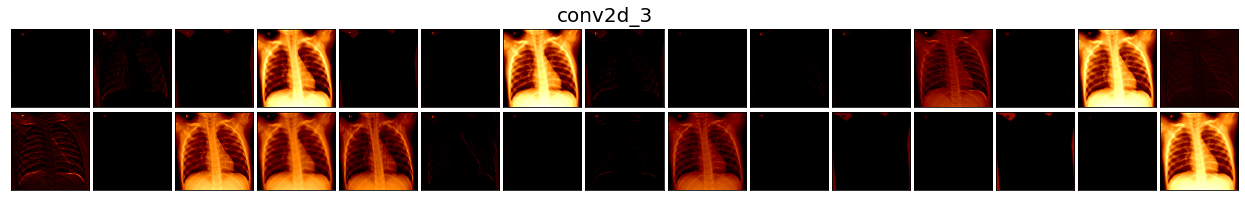

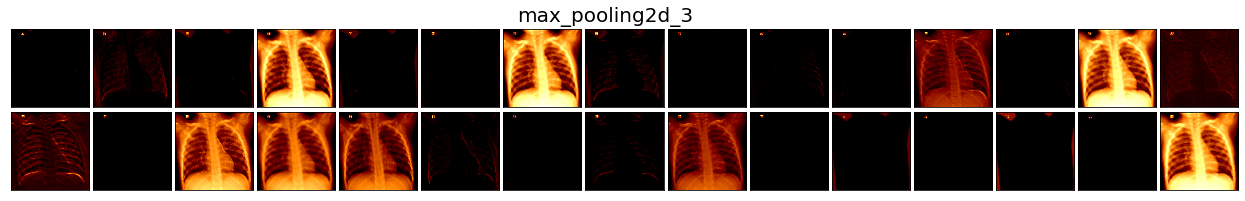

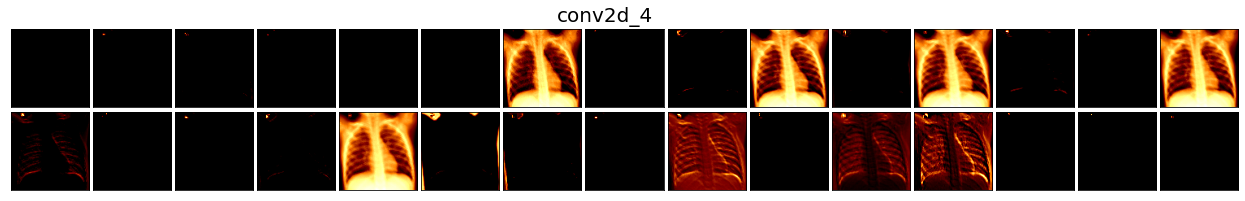

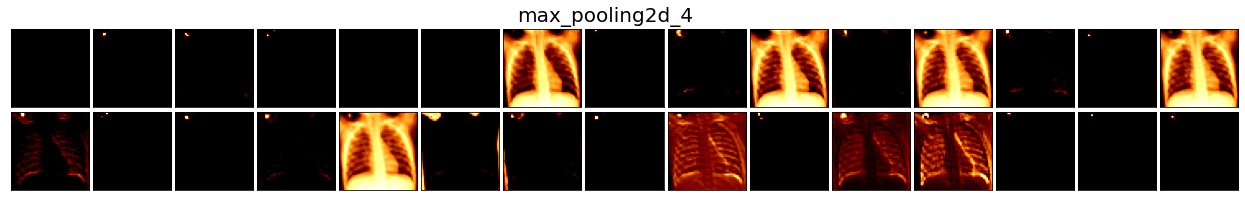

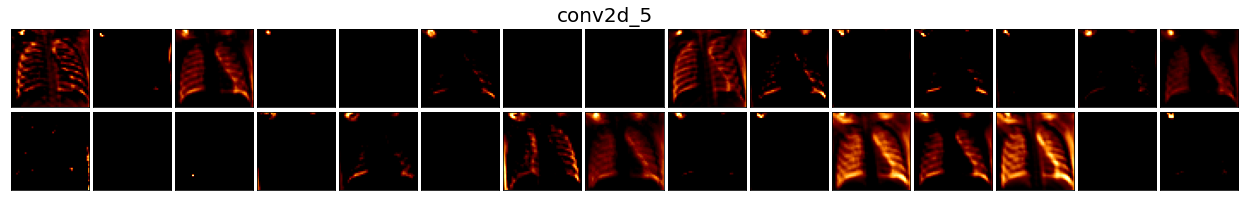

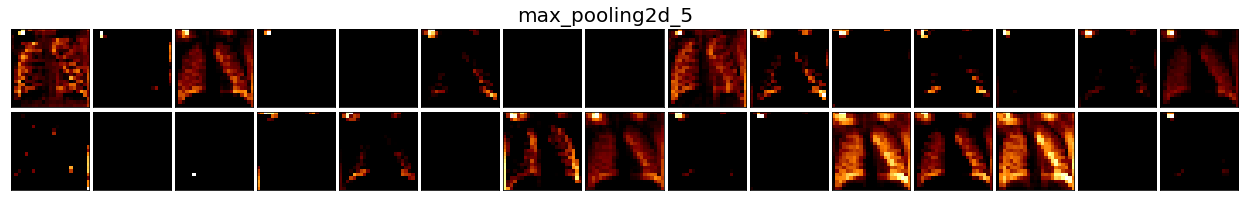

In [64]:
import cv2

images=[]
for img_path in glob.glob(dataset + '/normal/*'):
    im = cv2.imread(img_path)
    im = cv2.resize(im, (200,200))
    images.append(im)
for img_path in glob.glob(dataset + '/covid/*'):
    im = cv2.imread(img_path)
    im = cv2.resize(im, (200,200))
    images.append(im)

def CNN_layer_visualizer():
    
    layer_names = [layer.name for layer in model.layers] #list of input layers
    layer_outputs = [layer.output for layer in model.layers] # list of output layers
    activation_model = Model(inputs = model.input, outputs = layer_outputs) #creating the model using input layers list,output layers list
    random_number = random.randint(0,94)
    input = images[random_number]
    activations = activation_model.predict(input.reshape(-1, 200, 200, 3) / 255.0)
    #print(activations[0])
    for number in range(len(layer_names) - 4):
        fig = plt.figure(figsize = (22, 3))
        for img in range(30):
            #subplots(2,4)
            #add_subplots(2,2,1)
            
            ax = fig.add_subplot(2, 15, img + 1) # 3 parameters no of rows,no of columns,representing the axes
            ax = plt.imshow(activations[number][0, :, :, img], cmap = 'afmhot')
            main_title = fig.suptitle(str(layer_names[number]), fontsize = 20) 
            plt.xticks([]) #to represent the values in the x co-ordination system 
            plt.yticks([]) #to represent the values in the y co-ordination system 
            fig.subplots_adjust(wspace = 0.05, hspace = 0.05) #space between the width,height spaces between the images
            
CNN_layer_visualizer()

                     Loading the model and Weights

In [36]:
#Saving and Loading the weights
model.save(r'C:\Users\DELL\Desktop\COVID 19 Visualization & Detection/models/coviddetector_model.h5')
model_1 = tf.keras.models.load_model(r"C:\Users\DELL\Desktop\COVID 19 Visualization & Detection/models/coviddetector_model.h5")
model_1.load_weights(checkpoint_path)

In [37]:
#Open the file in the write mode
# dump information to that file
from pickle import *
file = r'C:\Users\DELL\Desktop\COVID 19 Visualization & Detection\classifier-data.pickle'
data = open(file,'wb')
dump(classifier.history['loss'], data) #storing the loss list info
dump(classifier.history['accuracy'], data)
dump(classifier.history['val_loss'], data)
dump(classifier.history['val_accuracy'], data) 
data.close()

#Load the data once you dump the data
with open(r'C:\Users\DELL\Desktop\COVID 19 Visualization & Detection\classifier-data.pickle','rb') as f:   
    loss_list = load(f) #loading the loss_list info
    accuracy_list = load(f)
    val_loss_list = load(f)
    val_accuracy_list = load(f)
print(loss_list)

f.close()

[1.0735682249069214, 0.6465440988540649, 0.5941793918609619, 0.5377835631370544, 0.5139648914337158, 0.41970065236091614, 0.35036373138427734, 0.29938873648643494, 0.3068491518497467, 0.24096524715423584, 0.14891976118087769, 0.1342068910598755, 0.1720871478319168, 0.12942156195640564, 0.11168032884597778, 0.12629173696041107, 0.12847650051116943, 0.047700826078653336, 0.06457987427711487, 0.09509836882352829, 0.03561742231249809, 0.03407512977719307, 0.05039092153310776, 0.09260699898004532, 0.07405112683773041, 0.0415835827589035, 0.0629962906241417, 0.02492510713636875, 0.06966596841812134, 0.11145549267530441, 0.03544493019580841, 0.11870866268873215, 0.16479510068893433, 0.22764797508716583, 0.217344731092453, 0.28378987312316895, 0.2961101233959198, 0.2856723368167877, 0.2306290715932846, 0.16893184185028076, 0.17828357219696045, 0.08949059247970581, 0.06366908550262451, 0.053435444831848145, 0.03775035962462425, 0.053636156022548676, 0.038556646555662155, 0.014325827360153198, 0

In [38]:
#Printing the Training Accuracy and Validation Accuracy
print("training_accuracy", accuracy_list[-1])
print("validation_accuracy", val_accuracy_list[-1])

training_accuracy 1.0
validation_accuracy 1.0


In [39]:
#Printing the Training Loss and Validation Loss
print("training_loss", loss_list[-1])
print("validation_loss", val_loss_list[-1])

training_loss 0.006799701601266861
validation_loss 0.01212775707244873


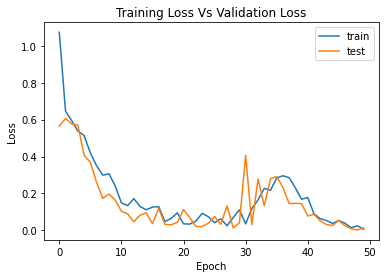

In [40]:
#Plotting the Loss and val Loss per Each Epoc
plt.plot(loss_list)
plt.plot(val_loss_list)
plt.title('Training Loss Vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

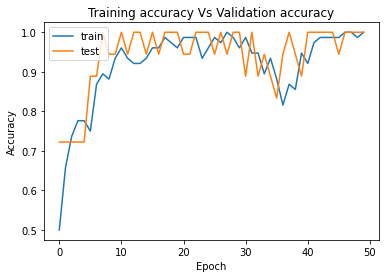

In [41]:
#Plotting the Accuracy and val Accuracy per Each Epoch
plt.plot(accuracy_list)
plt.plot(val_accuracy_list)
plt.title('Training accuracy Vs Validation accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

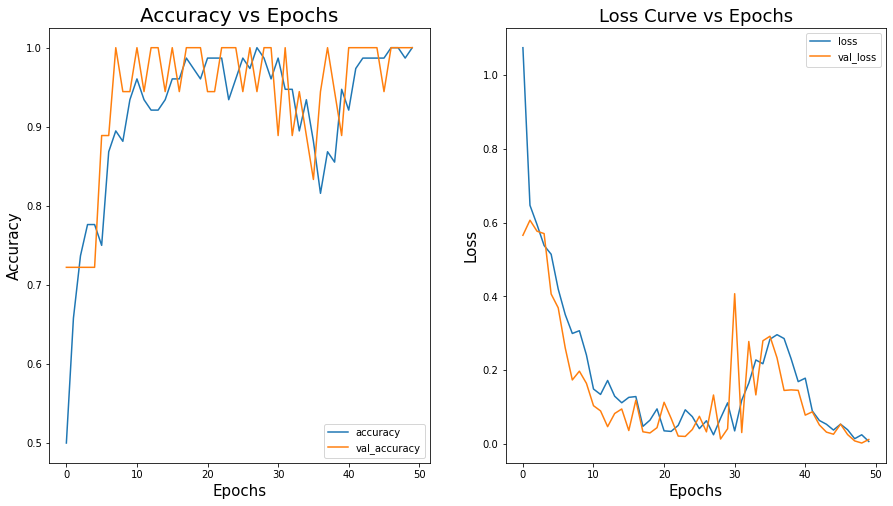

In [42]:
def model_performance_graphs():
    
    fig, axes = plt.subplots(1, 2, figsize = (15, 8))

    axes[0].plot(classifier.epoch, accuracy_list, label = 'accuracy')
    axes[0].plot(classifier.epoch, val_accuracy_list, label = 'val_accuracy')
    axes[0].set_title('Accuracy vs Epochs', fontsize = 20)
    axes[0].set_xlabel('Epochs', fontsize = 15)
    axes[0].set_ylabel('Accuracy', fontsize = 15)
    axes[0].legend()

    axes[1].plot(classifier.epoch, loss_list, label = 'loss')
    axes[1].plot(classifier.epoch, val_loss_list, label="val_loss")
    axes[1].set_title("Loss Curve vs Epochs",fontsize=18)
    axes[1].set_xlabel("Epochs",fontsize=15)
    axes[1].set_ylabel("Loss",fontsize=15)
    axes[1].legend()

    plt.show()
    
model_performance_graphs()

## Confusion Matrix

In [43]:
#from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
#Predicting the classes on validation data
Y_pred = model_1.predict_generator(Validation_data)
y_pred = np.argmax(Y_pred ,axis =1)
print('Confusion Matrix')
confusion_matrix = confusion_matrix(Validation_data.classes, y_pred)
print(confusion_matrix)
print('Classification Report')
target_names = ['normal', 'covid']
print(classification_report(Validation_data.classes, y_pred, target_names=target_names))

Confusion Matrix
[[7 6]
 [5 0]]
Classification Report
              precision    recall  f1-score   support

      normal       0.58      0.54      0.56        13
       covid       0.00      0.00      0.00         5

    accuracy                           0.39        18
   macro avg       0.29      0.27      0.28        18
weighted avg       0.42      0.39      0.40        18



<AxesSubplot:>

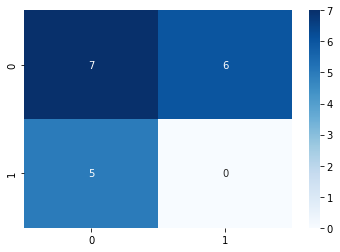

In [44]:
import seaborn as sns
sns.heatmap(confusion_matrix,cmap="Blues", annot = True)

Text(0.5, 1.0, 'normal')

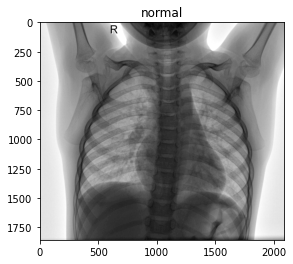

In [52]:
from keras.preprocessing import image
import random
#testing the image
random_num = random.randint(0,177)
img = r"C:\Users\DELL\Desktop\COVID 19 Visualization & Detection\Datasets\Dataset for Detection\normal\IM-0115-0001.jpeg"
plt.imshow(mpimg.imread(img),cmap = plt.colormaps()[random_num])
test_image = image.load_img(img, target_size = (200,200,1))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model_1.predict(test_image)
classes_x=np.argmax(result,axis=1)
#[0 1] 
#[1 0]
if result[0][0]==1:
    prediction = 'covid'
else :
    prediction = 'normal'
plt.title(prediction)
#len(plt.colormaps())